In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

CSV 파일 불러오기

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

df = pd.read_csv("C:\dataset\diabetes.csv", index_col=0)
df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,,,,,,,,
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
10,101,76,48,180,32.9,0.171,63,0
2,122,70,27,0,36.8,0.340,27,0
5,121,72,23,112,26.2,0.245,30,0


In [11]:
# 데이터 확인
df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,,,,,,,,
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
10,101,76,48,180,32.9,0.171,63,0
2,122,70,27,0,36.8,0.340,27,0
5,121,72,23,112,26.2,0.245,30,0


In [12]:
# 컬렴명 확인
df.columns

Index(['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

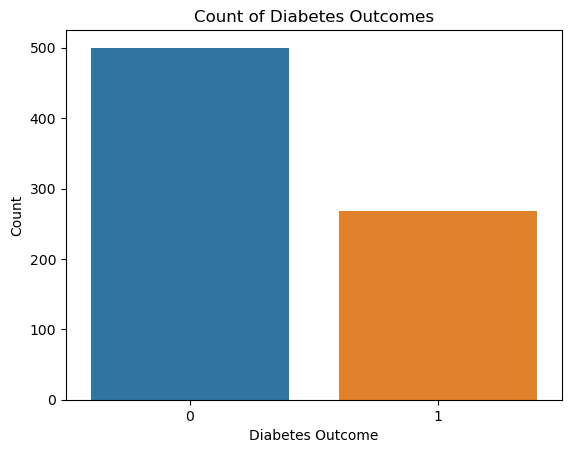

In [4]:
# 레이블 갯수 확인 (그래프)
sns.countplot(data=df, x="Outcome")
plt.xlabel("Diabetes Outcome")
plt.ylabel("Count")
plt.title("Count of Diabetes Outcomes")
plt.show()

In [5]:
# 레이블 갯수 확인 (숫자)
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [6]:
# 결측치 확인
df.isnull().sum()

Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
# 결측치 제거
df = df.dropna()
df.isnull().sum()

Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


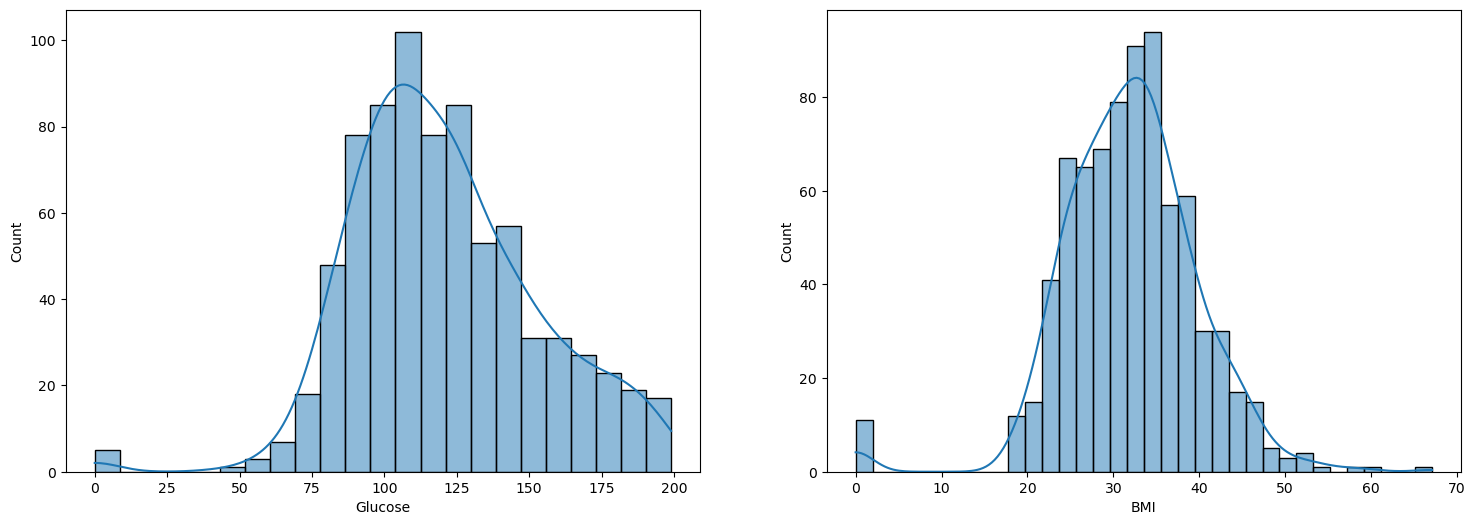

In [8]:
# 컬럼별 히스토그램 확인
# 'Glucose'와 'BMI' 칼럼을 선택
figure = plt.figure(figsize=(18, 6))
ax1 = plt.subplot(1, 2, 1)
sns.histplot(df['Glucose'], kde=True, ax=ax1)  # distplot 대신 histplot 사용
ax2 = plt.subplot(1, 2, 2)
sns.histplot(df['BMI'], kde=True, ax=ax2)  # distplot 대신 histplot 사용

plt.show()

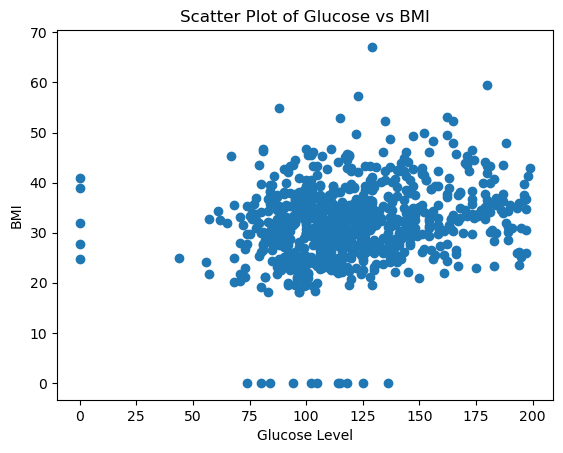

In [9]:
# 산점도 확인
# 실제 데이터셋의 적절한 컬럼 선택
plt.scatter(df['Glucose'], df['BMI'])  # 예시로 'Glucose'와 'BMI' 컬럼 사용
plt.xlabel('Glucose Level')
plt.ylabel('BMI')
plt.title('Scatter Plot of Glucose vs BMI')
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

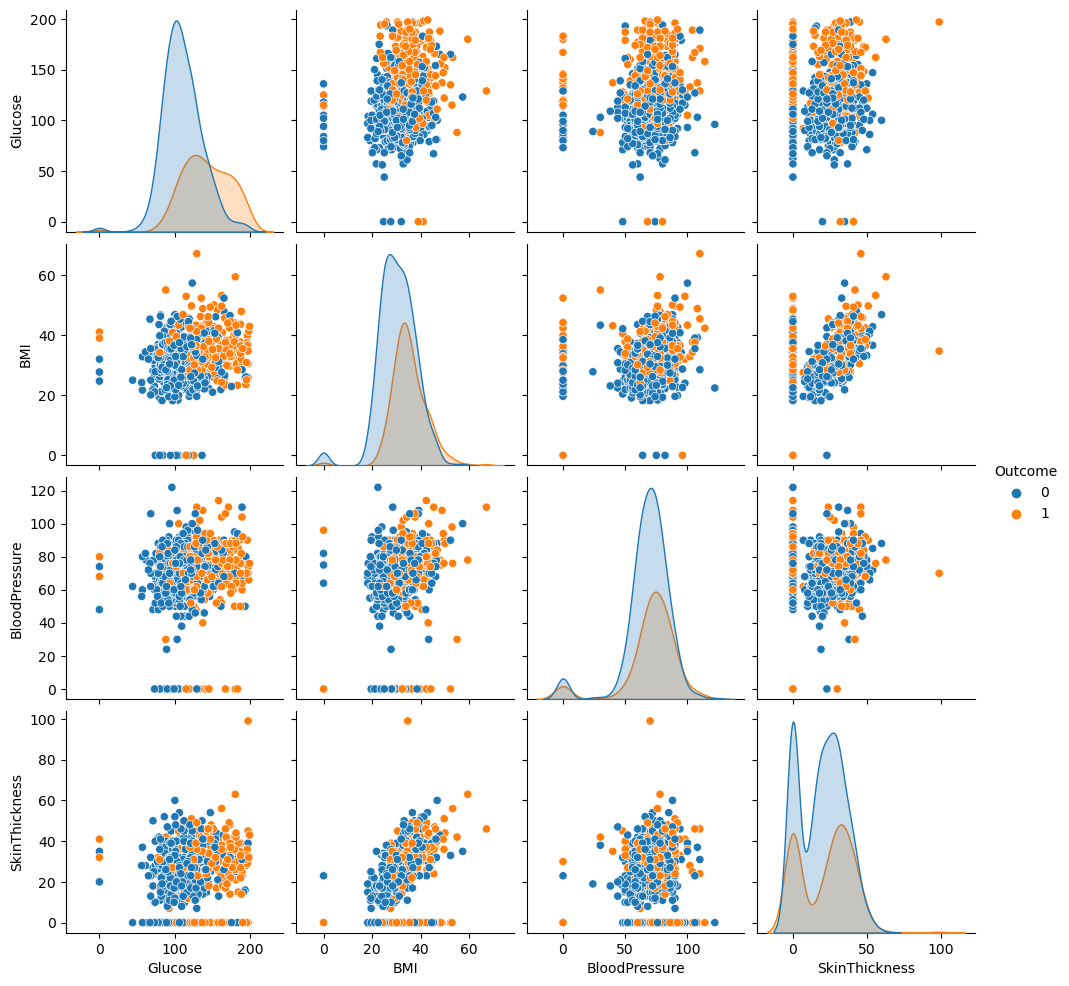

In [24]:
# pairplot을 사용해 각 상관관계 살펴보기
# 실제 데이터셋의 적절한 컬럼 선택
sns.pairplot(df,
             vars=['Glucose', 'BMI', 'BloodPressure', 'SkinThickness'],  # 예시 컬럼
             hue='Outcome')  # 'label' 대신 'Outcome' 사용
plt.show()

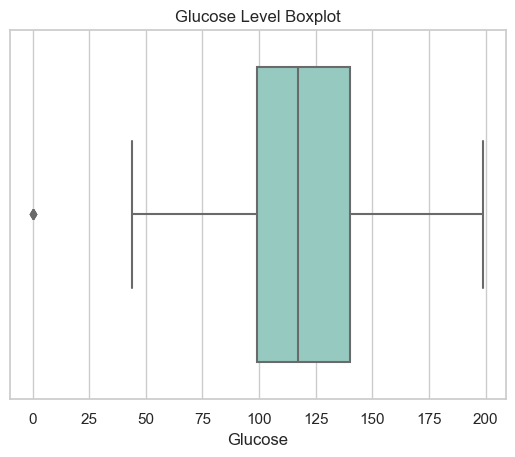

In [11]:
# 특정 칼럼의 범위 확인 및 outlier 확인
sns.set_theme(style="whitegrid")
sns.boxplot(x="Glucose", data=df, palette="Set3")  # 'mean radius' 대신 'Glucose' 사용
plt.title("Glucose Level Boxplot")
plt.show()

C:\Users\김경환\AppData\Local\Temp\ipykernel_2012\913794904.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax=ax, bins=30, edgecolor='black')  # bins 수 조정 가능


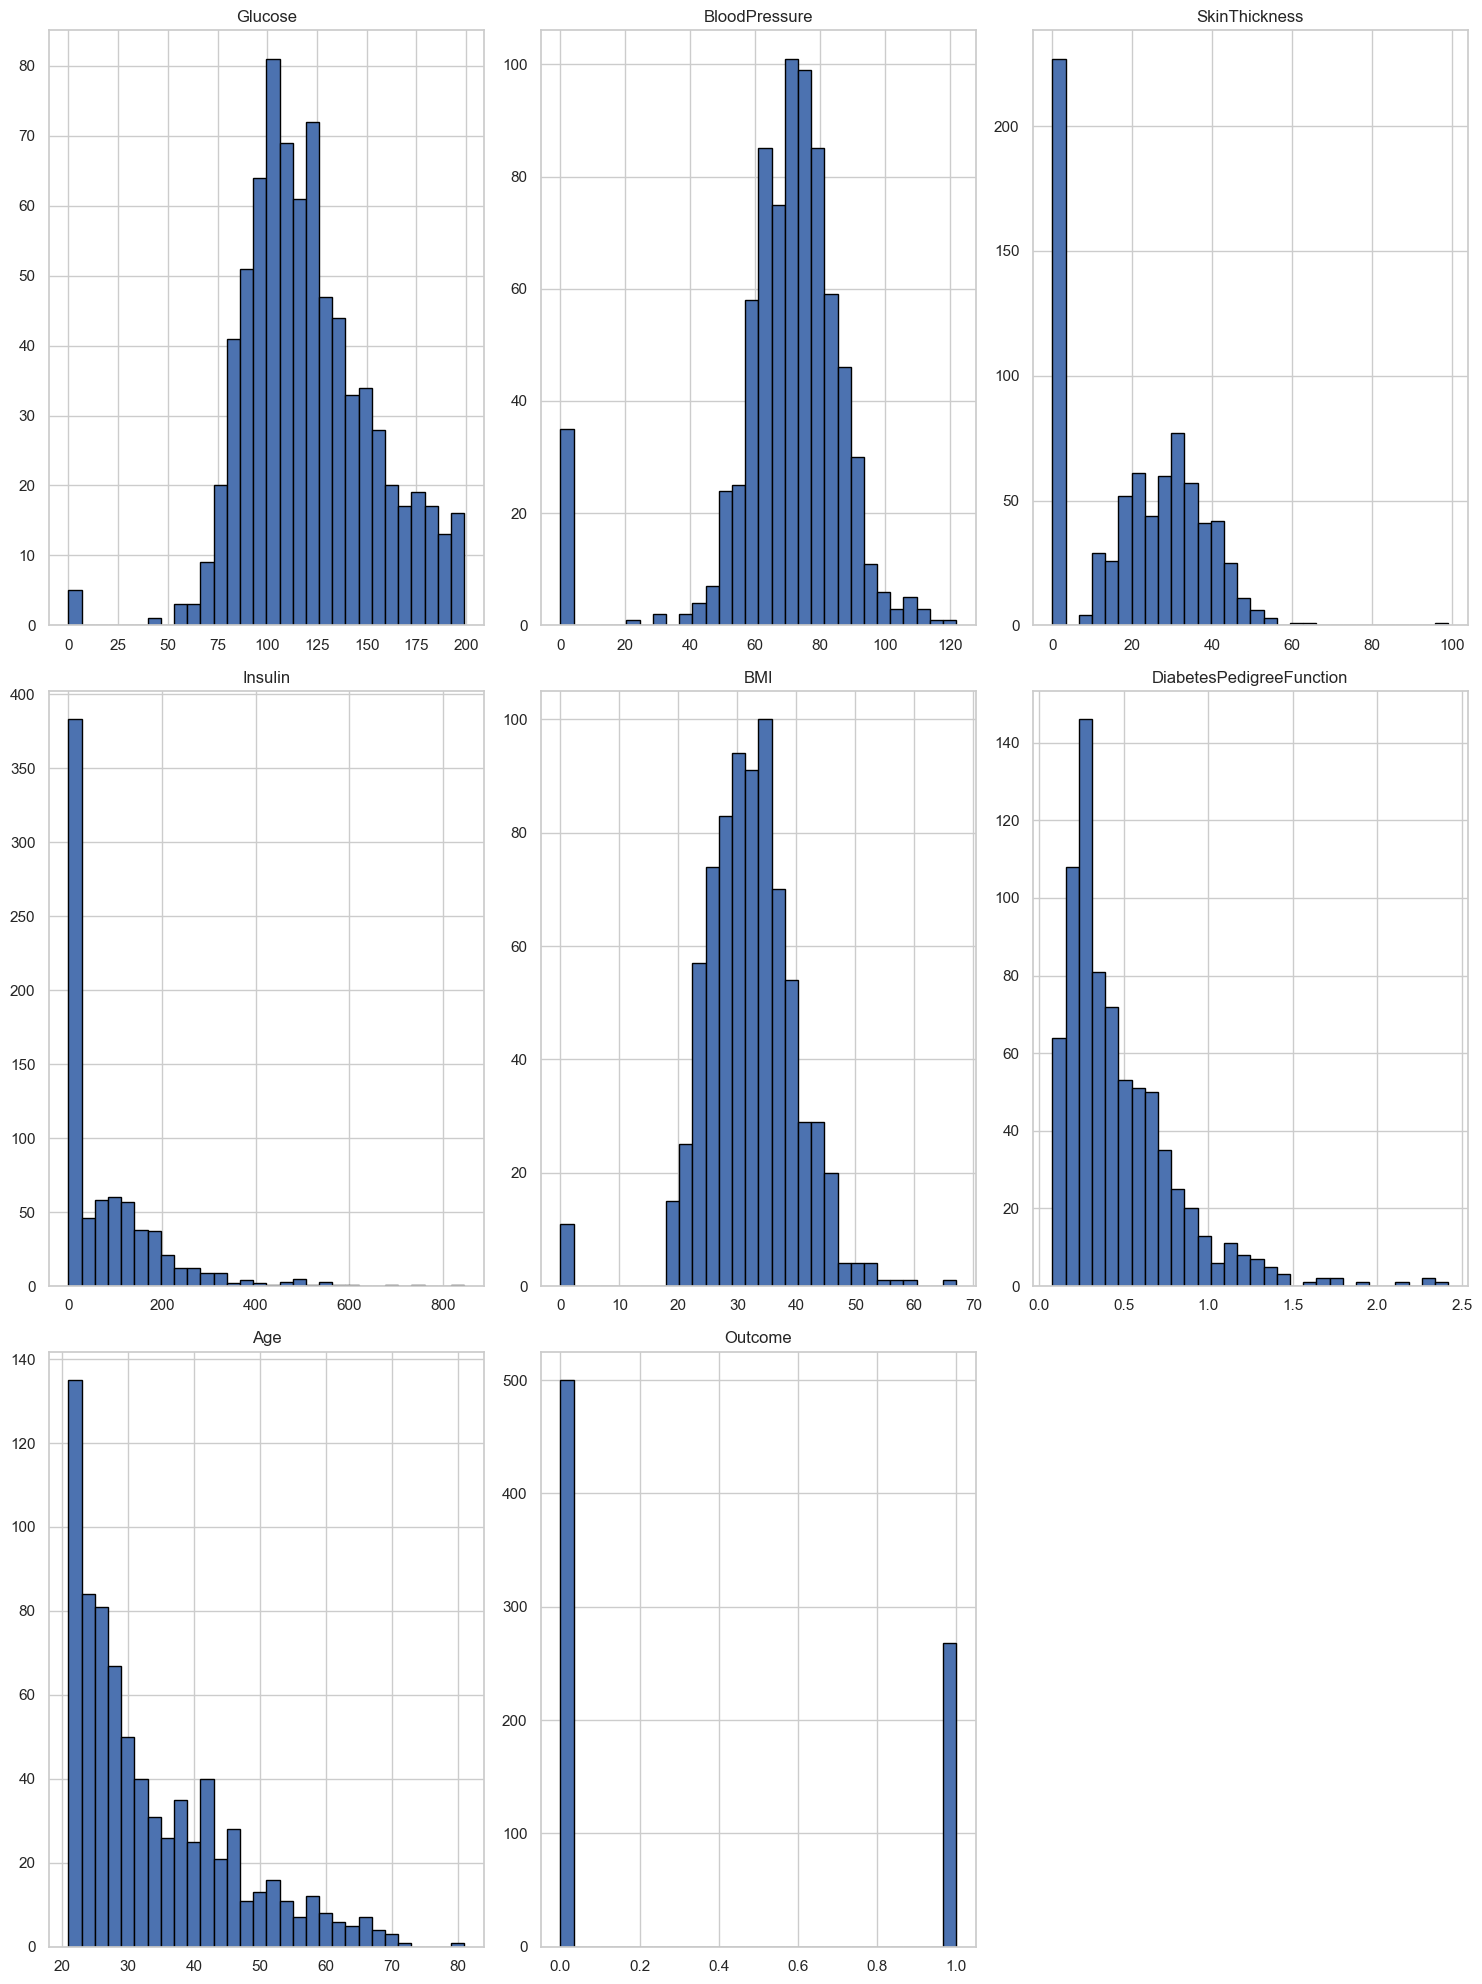

In [26]:
# 각 컬럼별 히스토그램 확인
fig = plt.figure(figsize=(15, 20))
ax = fig.gca()
df.hist(ax=ax, bins=30, edgecolor='black')  # bins 수 조정 가능
plt.tight_layout()  # 레이아웃 자동 조정
plt.show()

In [12]:
# 컬럼을 제외한 데이터프레임 X 생성
X = df.drop('Outcome', axis=1)  
y = df['Outcome']  # 타겟 변수 설정

In [13]:
df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,,,,,,,,
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
10,101,76,48,180,32.9,0.171,63,0
2,122,70,27,0,36.8,0.340,27,0
5,121,72,23,112,26.2,0.245,30,0


In [16]:
y.head()

Pregnancies
6    1
1    0
8    1
1    0
0    1
Name: Outcome, dtype: int64

In [18]:
Y = pd.get_dummies(y).values

In [19]:
X = X.values

In [20]:
X

array([[148.   ,  72.   ,  35.   , ...,  33.6  ,   0.627,  50.   ],
       [ 85.   ,  66.   ,  29.   , ...,  26.6  ,   0.351,  31.   ],
       [183.   ,  64.   ,   0.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [121.   ,  72.   ,  23.   , ...,  26.2  ,   0.245,  30.   ],
       [126.   ,  60.   ,   0.   , ...,  30.1  ,   0.349,  47.   ],
       [ 93.   ,  70.   ,  31.   , ...,  30.4  ,   0.315,  23.   ]])

In [21]:
y

Pregnancies
6     1
1     0
8     1
1     0
0     1
     ..
10    0
2     0
5     0
1     1
1     0
Name: Outcome, Length: 768, dtype: int64

In [22]:
Y

array([[False,  True],
       [ True, False],
       [False,  True],
       ...,
       [ True, False],
       [False,  True],
       [ True, False]])

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0) 

In [30]:
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.optimizers import Adam

# 모델 정의
model = Sequential()

# 첫 번째 레이어에서 Input 객체 사용
model.add(Input(shape=(7,)))  # input_shape를 Input 객체로 대체
model.add(Dense(10, activation='tanh'))
model.add(Dense(8, activation='tanh'))
model.add(Dense(6, activation='tanh'))
model.add(Dense(2, activation='softmax'))

# Adam 옵티마이저에서 lr 대신 learning_rate 사용
model.compile(optimizer=Adam(learning_rate=0.04), loss='categorical_crossentropy', metrics=['accuracy'])

# 모델 요약 출력
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 10)                  │              80 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 8)                   │              88 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 6)                   │              54 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 2)                   │              14 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 236 (944.00 B)

 Trainable params: 236 (944.00 B)

 Non-trainable params: 0 (0.00 B)

In [31]:
# 모델 훈련
model_history = model.fit(x=X_train, y=y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))

# 예측
y_pred = model.predict(X_test)

# 클래스 예측
y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)

Epoch 1/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.6624 - loss: 0.6487 - val_accuracy: 0.6948 - val_loss: 0.6636
Epoch 2/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6247 - loss: 0.6716 - val_accuracy: 0.6948 - val_loss: 0.6875
Epoch 3/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6499 - loss: 0.6649 - val_accuracy: 0.6948 - val_loss: 0.6692
Epoch 4/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6491 - loss: 0.6652 - val_accuracy: 0.6948 - val_loss: 0.6217
Epoch 5/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6242 - loss: 0.6605 - val_accuracy: 0.6948 - val_loss: 0.6101
Epoch 6/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6287 - loss: 0.6703 - val_accuracy: 0.6948 - val_loss: 0.6032
Epoch 7/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6479 - loss: 0.6442 - val_accuracy: 0.7078 - val_loss: 0.5992
Epoch 8/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6273 - loss: 0.6677 - val_accuracy: 0.6948 - val_loss

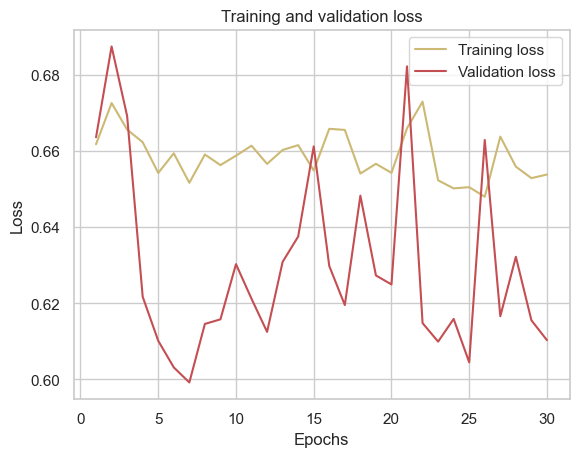

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

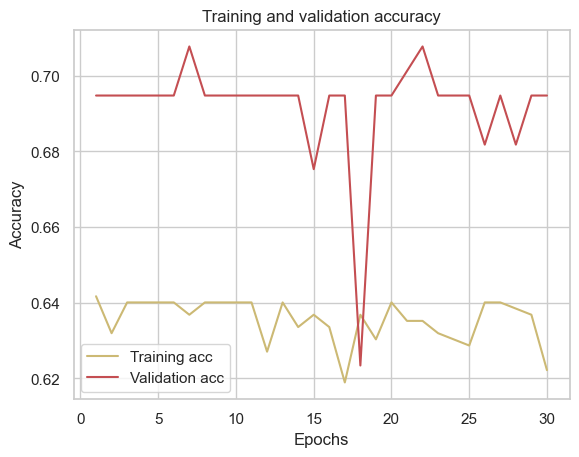

In [33]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [34]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.69      1.00      0.82       107
           1       0.00      0.00      0.00        47

    accuracy                           0.69       154
   macro avg       0.35      0.50      0.41       154
weighted avg       0.48      0.69      0.57       154

[[107   0]
 [ 47   0]]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
